In [ ]:
# loading the class data from the package pandas_datareader
from pandas_datareader import data
import datetime as dt
# First day
start_date = dt.datetime(2024, 1, 1) #'2019-09-10'
# Last day
end_date = dt.datetime(2024, 1, 3)#'2019-10-09'
# Data source
search_engine = 'GOOG'
# Instrument name
data_source = 'yahoo-dividends'
# Call the function DataReader from the class data
goog_data = data.DataReader(search_engine, data_source, start=start_date, end=end_date)

In [5]:
import pandas_datareader.data as web
import pandas as pd

pd.options.display.width = 0
pd.options.display.max_rows = 20

dji_data = web.DataReader('^DJI', 'stooq')

dji_reverse_data = dji_data.iloc[::-1]

dji_reverse_data.to_csv('dji_data.csv')

dji_reverse_data

,Open,High,Low,Close,Volume
Date,,,,,
2019-05-01,26639.06,26689.39,26426.38,26430.14,303824427.0
2019-05-02,26407.15,26454.69,26180.36,26307.79,287700790.0
2019-05-03,26379.14,26534.96,26370.09,26504.95,248938257.0
2019-05-06,26160.62,26476.27,26033.95,26438.48,283101899.0
2019-05-07,26276.90,26276.90,25789.71,25965.09,334991424.0
...,...,...,...,...,...
2024-04-22,38116.89,38447.16,37985.07,38239.98,334134195.0
2024-04-23,38356.07,38561.50,38297.72,38503.69,306022116.0
2024-04-24,38552.79,38552.79,38310.55,38460.92,325086001.0


In [3]:
import pandas as pd
import numpy as np

dji_data_result = pd.read_csv('dji_data.csv', index_col=0)

data_signal = pd.DataFrame(index=dji_data_result.index)

data_signal['price'] = dji_data_result['Close']

data_signal['daily_difference'] = data_signal['price'].diff()

data_signal['signal'] = 0.0
data_signal['signal'] = np.where(data_signal['daily_difference'] > 0, 1.0, 0.0)

data_signal['positions'] = data_signal['signal'].diff()

data_signal.to_csv('data_signal.csv')

data_signal

,price,daily_difference,signal,positions
Date,,,,
2019-05-01,26430.14,NaN,0.0,NaN
2019-05-02,26307.79,-122.35,0.0,0.0
2019-05-03,26504.95,197.16,1.0,1.0
2019-05-06,26438.48,-66.47,0.0,-1.0
2019-05-07,25965.09,-473.39,0.0,0.0
...,...,...,...,...
2024-04-22,38239.98,253.58,1.0,0.0
2024-04-23,38503.69,263.71,1.0,0.0
2024-04-24,38460.92,-42.77,0.0,-1.0


Matplotlib is building the font cache; this may take a moment.


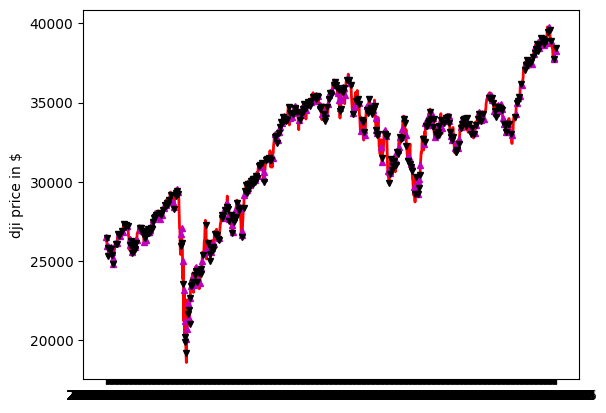

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

data_signal_result = pd.read_csv('data_signal.csv', index_col=0)

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='dji price in $')

#data_signal_result['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(data_signal_result.price.index, 
         data_signal_result.price, color='r', lw=2.)

ax1.plot(
data_signal_result.price[data_signal_result.positions == 1.0].index,
data_signal_result.price[data_signal_result.positions == 1.0],
'^', markersize=5, color='m')

ax1.plot(
data_signal_result.price[data_signal_result.positions == -1.0].index,
data_signal_result.price[data_signal_result.positions == -1.0],
'v', markersize=5, color='k')

plt.show()

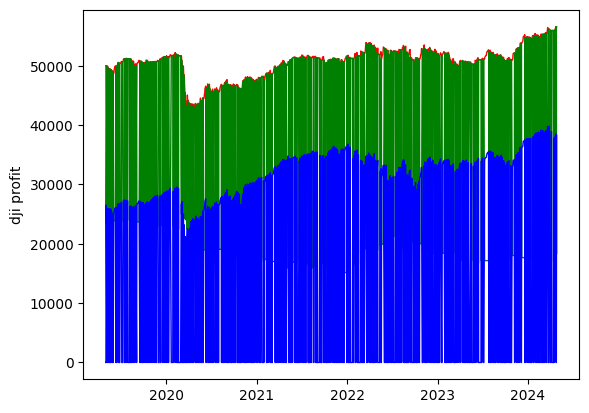

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

data_signal_result = pd.read_csv('data_signal.csv', index_col=0)

data_signal_result.index = pd.to_datetime(data_signal_result.index)

initial_capital = float(50_000.0)

positions = pd.DataFrame(index=data_signal_result.index).fillna(0.0)
portfolio = pd.DataFrame(index=data_signal_result.index).fillna(0.0)

positions['DJI'] = data_signal_result['signal']

portfolio['positions'] = (positions.multiply(data_signal_result['price'], axis=0))

portfolio['cash'] = initial_capital - (positions.diff().multiply(data_signal_result['price'], axis=0)).cumsum()

portfolio['total'] = portfolio['positions'] + portfolio['cash']

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='dji profit')

ax1.plot(portfolio.total, color='r', lw=1.)

ax1.plot(portfolio.cash, color='g', lw=1.)

ax1.plot(portfolio.positions, color='b', lw=1.)

plt.show()